# Learning Quantum Computing with Qiskit

Quantum computing is a rapidly advancing field with the potential to redefine computation and problem-solving as we know it. As technology advances, quantum computers show promise in tackling challenges that are currently out of reach for classical computers. By understanding the basics of quantum computing, enthusiasts and professionals alike can begin to appreciate its transformative capabilities and future applications.

Quantum computers, for example, can solve problems exponentially faster than traditional computers, allowing them to tackle issues that would take classical computers thousands of years in mere minutes. Additionally, quantum computing has significant implications for cybersecurity. While it threatens current encryption protocols, it also drives the development of post-quantum cryptography, which promises stronger data protection. Through this tutorial, we aim to provide users with an introduction to quantum concepts specifically the threats it poses to the current encription protocols. 

#### Learning Objectives
By the end of this tutorial, you will:
+ Understand the basics of quantum computing
+ Know how to use the Qiskit library
+ Be familiar with popular quantum algorithms
+ Learn tools to start quantum computing projects

# I. Introduction to Quantum Computing

In this section, we’ll provide an overview of foundational concepts of quantum computing concepts. This will be a theory-focused section, setting up a foundation of knowledge necessary for Part II, where users will engage in hands-on exercises with Qiskit. The main goal is to introduce key differences between classical and quantum computing, along with essential quantum concepts, in a beginner-friendly manner. After completing Part I, users should have a high-level understanding of how quantum computing works and feel prepared to explore the basics of coding in Qiskit. 

## Classical Computing vs. Quantum Computing

Quantum computing works in a different way than the classical computing that we're used to. A classical computer is what you are viewing this on right now, and includes things like laptops, PCs, smartphones, and tablets. Quantum computers are a lot more rare, and are typically kept in strictly monitored environments that prevent physical disturbance of the computer. Although classical computers are more popular, quantum computers have a much higher processing power. And even though they are both computers, the way they operate is fundamentally different. Below highlights the differences in how these computers work:  

### Classical Computers
* Store data in bits
* Operations are based on Boolean algebra
* Circuits are modeled from classical physics
* Bits can only be in two states: 0 or 1

### Quantum Computers
* Store data in qubits
* Operations are based on linear algebra
* Circuits are modeled from quantum mechanics
* There are an infinite amount of qubit states


## What is a Qubit?

A Qubit, also known as a quantum bit, is the basic unit of information in quantum computing.
A qubit is a two-state quantum system that can represent a 0, a 1, or any proportion of both. A two-state quantum system has two physically distinguishable features. These features are what encode 0 and 1. For example, the spin of an electron can be used as a qubit, with spin up and spin down representing 0 and 1 respectively. Overall, qubits are created by manipulating and measuring quantum particles, such as electrons, photons, or trapped ions. 

Additionally, qubits use quantum mechanical phenomena like superposition and entanglement to encode and process information.

1. **Superposition** is the principle that a quantum system can exist in multiple states simultaneously. For instance, in a classical scenario, a coin must be either heads or tails when observed. However, in quantum mechanics, a qubit can be in a state of "0" and "1" at the same time until it is measured. When the qubit is measured, it "collapses" into one of the two possible outcomes (either "0" or "1").

2. Entanglement is a quantum phenomenon where two or more particles become interconnected in such a way that the state of one particle directly affects the state of the other, no matter the distance between them. This connection creates a "shared" state across particles.

Furthermore, Qubits behave differently from bits, the basic unit of information in classical computing, because of the quantum properties they're based on. Quantum computing uses qubits to execute calculations instead of the electrical signals used in classical computing. 
  

## Major Concepts and Additional Terminology

#### Dirac (Bra-ket) Notation

[comment]: <> (Include multiple qubit kets)

To better understand qubits, we need a way to represent them. The most common way they are represented is with **Dirac Notation** also known as **Bra-ket** notation.

We can notate an arbitrary qubit as follows:

$$
\ket{\psi} = \alpha\ket{0} + \beta\ket{1}
$$

Note that $\ket{}$ is called a ket

Here, the qubit $\ket{\psi}$ is in superposition. Recall that this means that it's some proportion of both $\ket{0}$ and $\ket{1}$. Due to quantum mechanics, when we measure this qubit, it collapses and we observe it as either $\ket{0}$ or $\ket{1}$. It turns out, what we see depends on the superposition.

In particular, the probability that we find the qubit in $\ket{0}$ is $|\alpha|^2$ and the probability we find qubit in $\ket{1}$ is $|\beta|^2$.

Also note that since we find *either* $\ket{0}$ or $\ket{1}$, it must be true that $|\alpha|^2 + |\beta|^2 = 1$

These kets can also be represented as column vectors. In particular,

$$
\ket{0} = \begin{bmatrix}1 \\ 0 \end{bmatrix}
\newline
\ket{1} = \begin{bmatrix}0 \\ 1 \end{bmatrix}
$$

Therefore,
$\ket{\psi} = \begin{bmatrix}\alpha \\ \beta \end{bmatrix}$.

This proves useful when understanding quantum logic gates (explained in the next section).

We can extend this notation to include states with multiple qubits. Let's first consider the basis states $\ket{0}$ and $\ket{1}$. For a two-qubit state with qubits $A$ and $B$, there are 4 possible basis states: when both qubits are $\ket{0}$, qubit $A$ is $\ket{0}$ and qubit $B$ is $\ket{1}$, qubit $A$ is $\ket{1}$ and qubit $B$ is $\ket{0}$, and when both qubits are $\ket{1}$. In Dirac notation:

$$
\ket{0}_A\ket{0}_B \to \ket{00}
\newline
\ket{0}_A\ket{1}_B \to \ket{01}
\newline
\ket{1}_A\ket{0}_B \to \ket{10}
\newline
\ket{1}_A\ket{1}_B \to \ket{11}
$$

For an arbitrary two-qubit state:

So
$$
\ket{\psi}_AB = \alpha\ket{00} + \beta\ket{01} + \gamma\ket{10} + \delta\ket{11}
$$

Where $\ket{\psi}$ represents the state of the first qubit and $\ket{\phi}$ represents the state of the second qubit.

As vectors:

$$
\ket{00} = \begin{bmatrix}1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
\newline
\ket{01} = \begin{bmatrix}0 \\ 1 \\ 0 \\ 0 \end{bmatrix}
\newline
\ket{10} = \begin{bmatrix}0 \\ 0 \\ 1 \\ 0 \end{bmatrix}
\newline
\ket{11} = \begin{bmatrix}0 \\ 0 \\ 0 \\ 1 \end{bmatrix}
\newline
\ket{\psi}_{AB} = \begin{bmatrix}\alpha \\ \beta \\ \delta \\ \gamma \end{bmatrix}


#### **Additional Terminology**

**Probability Distributions**

In classical computing calculations yield definite answers (like 0s and 1s). However, quantum computing typically produces outcomes in terms of probability distributions. This means that the state of a quantum system is not fixed until it is measured.   

One example of this is presented through qubit superposition, as mentioned above, where a qubit can simultaneously represent both 0 and 1 until it is measured. Until this point, qubits are represented by the probability of it being measured as 0 or 1. When this idea is applied, for example in quantum circuits, results will reflect these probabilities over many runs, providing a meaningful distrbutoin of possible outcomes.   

Each possible basis state (for our purposes, $\ket{0}$ and $\ket{1}$) in a quantum system has a complex number called an amplitude, which when squared, gives the probability of observing that state upon measurement. Using the example of $\ket{\psi}$ from above, the amplitude for $\ket{0}$ is $\alpha$ and the amplitude for $\ket{1}$ is $\beta$. The probability distribution is derived from these amplitudes and provides a snapshot of what we will likely find when the qubit is measured. 

Understanding probability distribution is fundamental to interpreting quantum computing results.  Thankfully, Qiskit includes tools to visualize these distributions which we will go over later in this tutorial. 


**Interference** 

Interference is the manner in which different paths of quantum information overlap and either reinforce or cancel each other. This interference is key to algorithms because it is used to affect the probability amplitides of certain outcomes. Interference is the foundation of algorithms like Grover’s Search where the probabilities of correct values are amplified to appear more frequently. At the same time, Grover’s Srrach also uses destructive interference to diminish the probabilities of other outcomes. These ideas are key to understanding why quantum computers can perform more efficiently than classical computers. 

**Decoherence** 

Decoherence is the process where a quantum system loses it quantum properties and reverts back to a classical system. Environmental factors (such as electromagnetic waves interacting with qubits) that disrupt the quantum system are responsible for this process. This disruption can cause quibits in the system to lose their key properties, such as superposition and entanglement. Ultimately, this leads to errors during computation and is one of the main challenges faced in the proces of building reliable quantum computers. 




## Quantum Logic Gates
[comment]: <> (Need to include examples)
At the circuit level, classical computers are a bunch of logic gates. Similarly, the circuits for quantum computers make use of *quantum logic gates* also known as *operators*. Mathematically, these logic gates are matrices. When a qubit goes through a gate in a quantum circuit, the qubit (as a vector) gets left-multiplied by the gates (as a matrix). Here, we will go over the some of the major gates and provide some examples for clarity.

### X Gate
$$ 
X = 
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$$ 

So,

$$
X\ket{0} = \ket{1}
\newline
X\ket{1} = \ket{0}
\newline
X\ket{\psi} = \alpha\ket{1} + \beta\ket{0}
$$

We can think of the $X$-gate as a NOT gate.

### Z Gate
$$ 
Z = 
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$$ 

So,

$$
Z\ket{0} = \ket{0}
\newline
Z\ket{1} = -\ket{1}
\newline
Z\ket{\psi} = \alpha\ket{0} - \beta\ket{1}
$$

The $Z$-gate performs a *phase shift* within our qubit, which is necessary to fully manipulate it. Here, the *phase* is the negative assign that got attached to $\ket{1}$

### Hadamard Gate
$$
H =
\begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
\end{bmatrix}
$$

So,

$$
H\ket{0} = \frac{1}{\sqrt{2}}\ket{0} + \frac{1}{\sqrt{2}}\ket{1}
\newline
H\ket{1} = \frac{1}{\sqrt{2}}\ket{0} - \frac{1}{\sqrt{2}}\ket{1}
\newline
H\ket{\psi} = \frac{\alpha}{\sqrt{2}}\ket{0} - \frac{\beta}{\sqrt{2}}\ket{1}
$$

The Hadamard gate puts a qubit into an equal superposition. This means that when we measure the output, there will be an equal chance to get any one of the qubit's basis states (i.e. $\ket{0}$ and $\ket{1}$). Note that for $\ket{1}$, it adds a phase.

### CNOT Gate
Unlike the past three gates, the CNOT gates act on two qubits at a time.
$$
CNOT =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{bmatrix}
$$

So,

$$
CNOT\ket{00} = \ket{00}
\newline
CNOT\ket{01} = \ket{01}
\newline
CNOT\ket{10} = \ket{11}
\newline
CNOT\ket{00} = \ket{10}
$$

The CNOT gate is a *controlled* NOT gate. It applies an X-gate on the target qubit depending on the value of the control qubit. Here, the control qubit is the left qubit, and the target qubit is the right qubit. This gate is used to entangle qubits together.


# Part II. Using Qiskit

Now that we've covered the basics of quantum computing, we can start coding! To do this we will be using IBM's Qiskit library. Qiskit is a library that allows you to run your own quantum algorithms on IBM's quantum computers. We will set up a quantum channel that connects us to IBM's quantum hardware, create code using quantum circuits, and run our code through the quantum channel.

## Setting up Qiskit

### Installing Qiskit
Before we jump into using Qiskit, we have to install it. We can do so using `pip`.

If you'd rather use a virtual environment, feel free to download the `Miniconda` found at [this link](https://docs.anaconda.com/miniconda/miniconda-install/). For a step-by-step guide on setting up and installing Qiskit in the environment, see [this video by IBM](https://www.youtube.com/watch?v=dZWz4Gs_BuI&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=3).

In [ ]:
%pip install qiskit 
%pip install qiskit_ibm_runtime
%pip install qiskit-aer

### Creating an IBM Account

IBM requires you to make an account to access their quantum hardware. They have free and paid plans depending on how many jobs you'll be running. For now, we'll just sign up for the free plan, which provides you with 10 minutes of free runtime every month. 

Task: Make an account with the "Open Plan" from this link: https://www.ibm.com/quantum/pricing

Then, copy your API token for later use. (Don't share this with anyone!)

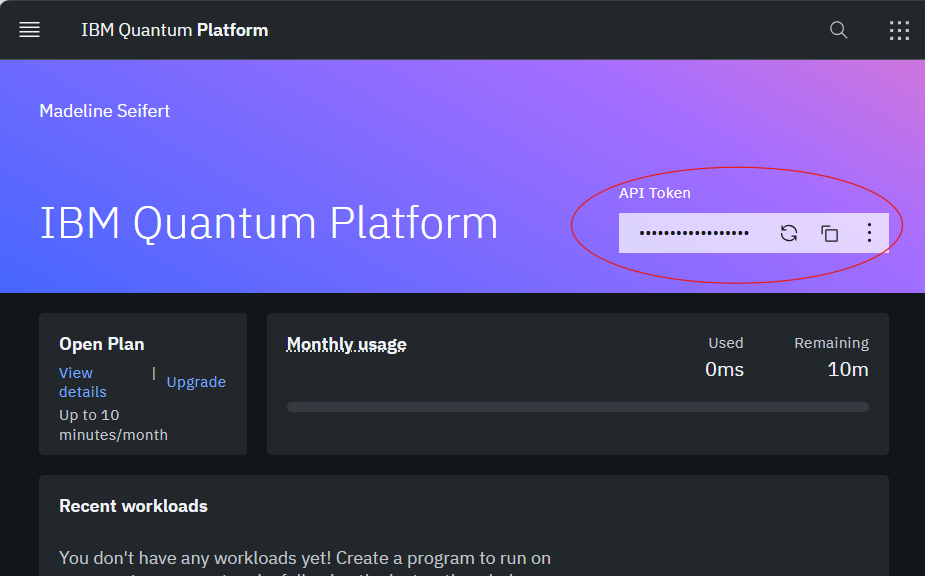

### Setting up a Quantum Channel

To run our code on IBM's quantum computers, we have to set up a channel to connect us to their computers. 

Task: Paste the API token from your account into the text below that says `YOUR_TOKEN_HERE`. Then, run the code cell to set up the quantum channel.

In [10]:
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService

# Setup the quantum channel 
service = QiskitRuntimeService(channel="ibm_quantum",
                              token = "YOUR_TOKEN_HERE")

## Qiskit Circuits and Operators

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Operator, Pauli, SparsePauliOp

## Transpilation

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

## Qiskit Primitives



In [14]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator

## Running Jobs

## Post-processing related stuff that we may not need

# Qiskit Workflow

In this section, we will be exploring the typical workflow when programming with Qiskit. In general, we follow the following steps:

1. Map the Problem to Circuits and Operators
2. Optimize for Quantum Hardware
3. Execute on the Backend
4. Post-process and Plot

To illustrate these steps, we will investigate two problems regarding the 4-qubit GHZ state, one which uses a Sampler and one that uses an Estimator. In general, the GHZ state is a maximally entangled quantum state that involves $n$ qubits. For this example, we will be using for qubits. In Dirac Notation, this four-qubit state is written as:

$$
\ket{GHZ} = \dfrac{1}{\sqrt{2}}(\ket{0000} + \ket{1111})
$$

Note that this is very similar to the Bell State, and that the Bell State is like a 2-qubit GHZ state.

## Finding Entanglement

The first problem we'd like to investigate is the entanglement found between the qubits in the GHZ state. To do so, we will need to find the expectation values of $ZZ$ gates. These operators measure the correlation between qubits, which is dependent on quantum entanglement. Due to quantum mechanics, this measurement isn't always the same. So, the expectation value of the $ZZ$ gates give us the expected correlation between two qubits.

### Step 1: Map the Problem to Circuits and Operators

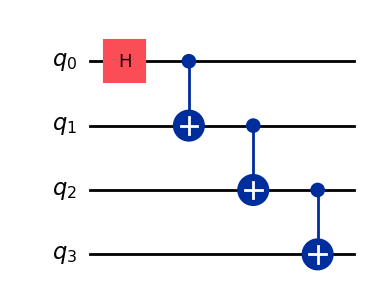

In [4]:
# Circuit with 4 qubits
ghz_e = QuantumCircuit(4)

# Add the gates for the GHZ state
ghz_e.h(0)
for i in range(3):
    ghz_e.cx(i, i+1)

ghz_e.draw(output="mpl")

In [8]:
# Set up the observables

# NOTE: NEED EXPLANATION FOR WHY THESE ARE THE OBSERVABLES
observables_labels = ["ZZII", "ZIZI", "ZIIZ"]
observables = [SparsePauliOp(label) for label in observables_labels]

### Step 2: Optimize for Quantum Hardware

In [ ]:
service = QiskitRuntimeService() # delete later

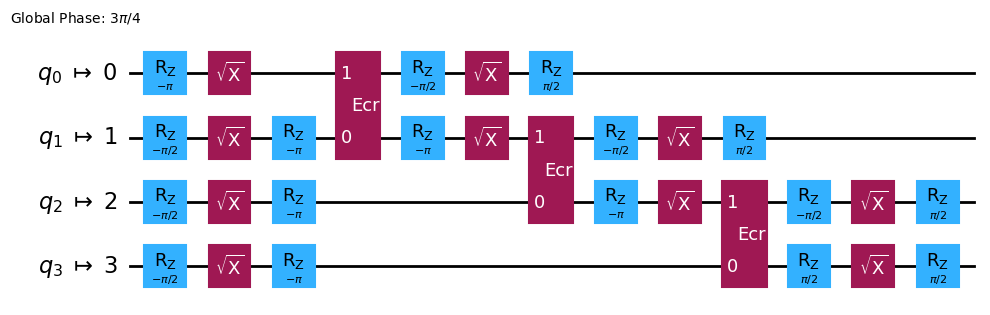

In [13]:
backend = service.least_busy(simulator=False, operational=True)
 
# Transpile the quantum circuit
pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=1)
ghz_e_transpiled = pass_manager.run(ghz_e)

ghz_e_transpiled.draw('mpl', idle_wires=False)

### Step 3: Execute on the Backend

In [16]:
# Construct the Estimator instance
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
mapped_observables = [
    observable.apply_layout(ghz_e_transpiled.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(ghz_e_transpiled, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f"Job ID: {job.job_id()}")

Job ID: cwvet2g60bqg008pmpn0


In [18]:
# TODO: this is from ibm, add explanation and maybe edit

# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

PubResult(data=DataBin(evs=np.ndarray(<shape=(3,), dtype=float64>), stds=np.ndarray(<shape=(3,), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(3,), dtype=float64>), shape=(3,)), metadata={'shots': 5024, 'target_precision': 0.01414213562373095, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32})

### Step 4: Post-Process and Plot

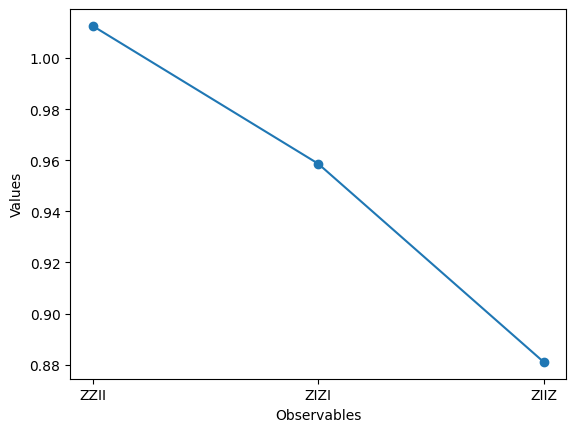

In [19]:
# Plot the result
# TODO:
 
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

*Include an explanation why this is the graph we expect*

## 2. Optimizing for Transpilation

Once we have our quantum circuit and observables. They have to be transpiled in order to be run on a quantum computer. 

# Part 3: Applying What we Know

To further illustrate the Qiskit workflow. We will create a truly random password generator

### Grover’s Search Algorithm

Delete this when the code is done.

**Tasks:** 
+ Run Grover’s Search Algorithm using Qiskit
+ Task: Use Grover’s Search Algorithm to decrypt an encrypted password

In [26]:
import math
import random

def oracle(x, target):
    """Oracle function that checks if x is the target."""
    return x == target

def diffuser(amplitudes):
    """Diffusion operator."""
    n = len(amplitudes)
    mean = sum(amplitudes) / n
    return [2 * mean - amplitude for amplitude in amplitudes]

def grover_search(n, target):
    """Grover's search algorithm."""
    amplitudes = [1 / math.sqrt(n) for _ in range(n)]
    iterations = int(math.pi / 4 * math.sqrt(n))

    for _ in range(iterations):
        for i in range(n):
            if oracle(i, target):
                amplitudes[i] *= -1
        amplitudes = diffuser(amplitudes)

    return amplitudes.index(max(amplitudes))

# Example usage
n = 8
target = 5
result = grover_search(n, target)
print("Target:", target)
print("Result:", result)


Target: 5
Result: 5


## Combining Classical and Quantum Computing

In [6]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

def generate_random_number():
    while True: 

        # circuit w/ 4 qubits and 4 classical bits
        qc = QuantumCircuit(4, 4)
        
        # Put each qubit in superposition
        for i in range(4):
            qc.h(i)
        
        # Measure all qubits
        qc.measure(range(4), range(4))
        
        # AerSimulator backend
        simulator = AerSimulator()
        job = simulator.run(qc, shots=1)
        result = job.result()
        counts = result.get_counts()
        
        # binary result converted it to an integer
        random_binary = list(counts.keys())[0]
        random_number = int(random_binary, 2)
        
        #range 0-9 (feel free to edit)
        if random_number <= 9:
            return random_number

def generate_random_numbers(n):
    random_numbers = [generate_random_number() for _ in range(n)]
    return random_numbers

#10 random numbers generated (feel free to edit)
n = 10 

random_numbers = generate_random_numbers(n)
print(random_numbers)

ModuleNotFoundError: No module named 'qiskit_aer'

Now, let's create a function that turns our random numbers into characters. To do that, we'll map each number to a character that can be used in a password. The function `num_to_char` is already written and will convert a given integer to a password character.

In [11]:
# Map a given number to a valid password character
def num_to_pchar(num):
    # map to one of the 93 possible ASCII characters in the range 33-126
    num = ((num % 93) + 33)
    return chr(num)

Use the `num_to_char` function to complete the `generate_password` function below, which will take in a list of integers and return a string.

In [ ]:
# Create a string from a given list of numbers
def generate_password(nums):

    # TODO: Implement this function!

    # Solution
    pword = ""
    for num in nums:
        pword += num_to_pchar(num)
    
    return pword

Now we can combine this with our random number generator we made before to generate a random password! If you implemented the `generate_password` function correctly, running the code below will print a randomly generated password.

In [10]:
rand_nums = []
password = generate_password(rand_nums)
print(password)

# References

1. https://www.ibm.com/topics/qubit
2. https://github.com/lynkos/grovers-algorithm/blob/main/src/grovers_algorithm.ipynb
3. https://www.youtube.com/playlist?list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi